# Stationary Example

In [67]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from pandas import Series
import numpy as np
from pandas import read_csv

In [18]:
series = pd.read_csv('daily-total-female-births.csv',header=0, index_col=0, squeeze=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_9748\1180074472.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('daily-total-female-births.csv',header=0, index_col=0, squeeze=True)


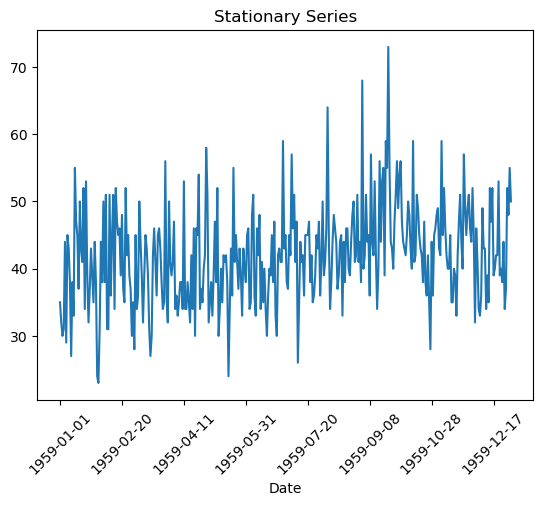

In [25]:
series.plot()
plt.title('Stationary Series')
plt.xticks(rotation = 45)
plt.show()

In [11]:
X = series.values

In [13]:
result = adfuller(X)

In [14]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


# Non Stationary Series

In [27]:
series_2 = pd.read_csv('airline-passengers.csv',header=0, index_col=0, squeeze=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_9748\3972349340.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series_2 = pd.read_csv('airline-passengers.csv',header=0, index_col=0, squeeze=True)


In [28]:
X_2 = series_2.values

In [29]:
result_2 = adfuller(X_2)

In [30]:
print('ADF Statistic: %f' % result_2[0])
print('p-value: %f' % result_2[1])
print('Critical Values:')
for key, value in result_2[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


# Differencing

C:\Users\admin\AppData\Local\Temp\ipykernel_9748\4182479282.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series_3 = read_csv('shampoo_sales.csv', parse_dates=[0], header=0, index_col=0, date_parser=dateparse, squeeze=True)


<AxesSubplot:xlabel='Month'>

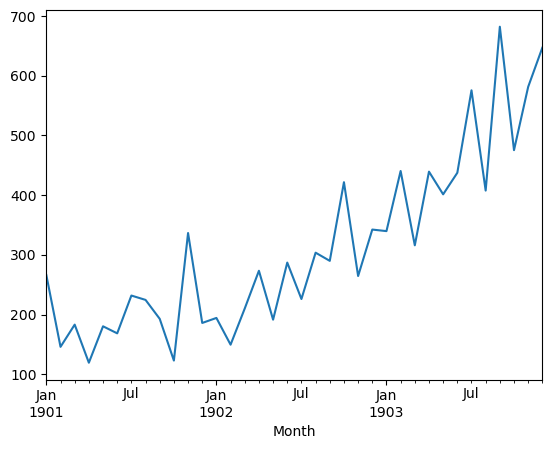

In [79]:
from datetime import datetime
dateparse = lambda x: datetime.strptime('190'+x, '%Y-%m')
series_3 = read_csv('shampoo_sales.csv', parse_dates=[0], header=0, index_col=0, date_parser=dateparse, squeeze=True)
series_3.plot()

In [81]:
X_3=series_3.values

In [82]:
def difference(dataset, interval=1):
 diff = list()
 for i in range(interval, len(dataset)):
     value = dataset[i] - dataset[i - interval]
     diff.append(value)
 return Series(diff)

In [83]:
diff=difference(X_3)

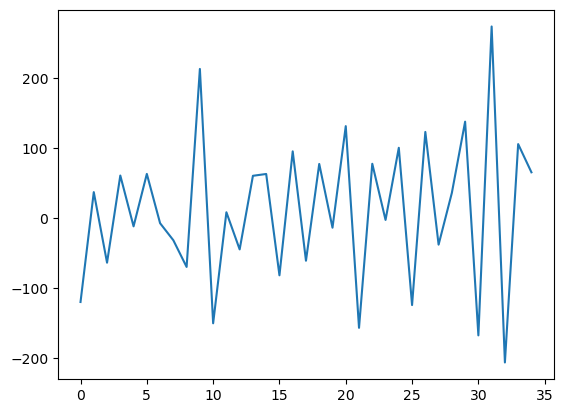

In [85]:
plt.plot(diff)

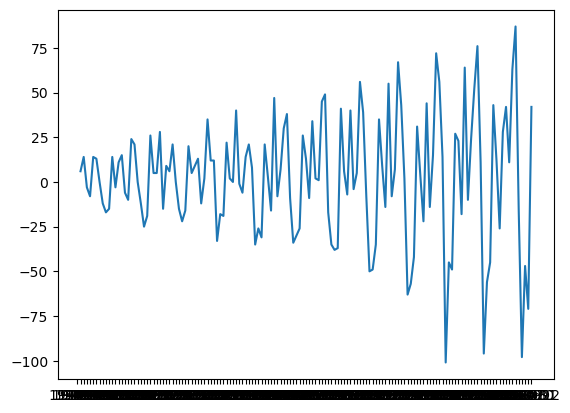

In [86]:
diff_2 = series_2.diff()
plt.plot(diff_2)
plt.show()

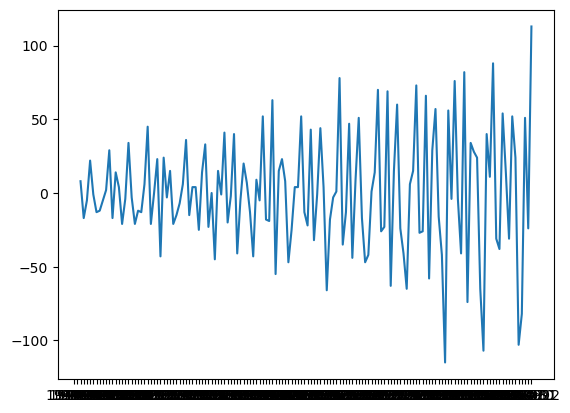

In [65]:
diff_2 = series_2.diff().diff()
plt.plot(diff_2)
plt.show()